In [194]:
import pandas as pd
import numpy as np

In [195]:
df = pd.read_csv("data_NIS.csv")

In [196]:
df = df.drop(df.columns[df.apply(lambda col: col.isna().sum() > 5)], axis=1)

In [176]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [177]:
df.rename(columns = {'Gym.1' : 'Gym', 'Garage.1' : 'Garage'}, inplace = True)

In [179]:
df['School'] = df[['School', 'School.1', 'School.2', 'School.3', 'School.4', 'School.5', 'School.10', '(Pre-)School', 'School.12', 'School.14', 'School.20', 'School.25']].mean(axis = 1)
df['Other'] = df[['Other.2', 'Other.3', 'Other']].mean(axis = 1)
df['Event hall'] = df[['Event hall', 'Event hall.2']].mean(axis = 1)
df['Graveyard'] = df[['Graveyard', 'Graveyard.1']].mean(axis = 1)
df['Office building'] = df[['Office building', 'Office building.1', 'Office building.4', 'Office building.5', 'Office building.8', 'Office building.9', 'Office building.10', 'Office building.11', 'Office building.13', 'Office building.14', 'Office building.15']].mean(axis = 1)
df['Swimming Pool'] = df[['Swimming Pool', 'Swimming Pool.1', 'Swimming Pool.2', 'Swimming Pool.3', 'Swimming Pool.4', 'Swimming Pool.5']].mean(axis = 1)

In [180]:
base_columns = ["Garden",
"School",
"Other",
"Zoo",
"Gym",
"Event hall",
"Graveyard",
"Office building",
"Swimming Pool",
"Firefighters"]

agg_cols = []
for b_col in base_columns:
    for col in df.columns:
      if (col.__contains__(b_col) and len(col) != len(b_col)):
        agg_cols.append(col)
print(agg_cols)

['School.1', 'School.2', 'School.3', 'School.4', 'School.5', 'School.10', '(Pre-)School', 'School.12', 'School.14', 'School.20', 'School.25', 'Other.2', 'Other.3', 'Event hall.2', 'Graveyard.1', 'Office building.1', 'Office building.4', 'Office building.5', 'Office building.8', 'Office building.9', 'Office building.10', 'Office building.11', 'Office building.13', 'Office building.14', 'Office building.15', 'Swimming Pool.1', 'Swimming Pool.2', 'Swimming Pool.3', 'Swimming Pool.4', 'Swimming Pool.5']


In [181]:
df = df.drop(['School.1', 'School.2', 'School.3', 'School.4', 'School.5', 'School.10', 'School.12', 'School.14', 'School.20', 'School.25', 'Other.2', 'Other.3', 'Event hall.2', 'Graveyard.1', 'Office building.1', 'Office building.4', 'Office building.5', 'Office building.8', 'Office building.9', 'Office building.10', 'Office building.11', 'Office building.13', 'Office building.14', 'Office building.15', 'Swimming Pool.1', 'Swimming Pool.2', 'Swimming Pool.3', 'Swimming Pool.4', 'Swimming Pool.5'], axis=1)

In [182]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [183]:
dates = df['Date']
df = df.groupby(['Date']).transform('mean')
dates.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([dates, df], axis = 1)
df = df.drop_duplicates()

In [184]:
df

,Date,Garden,School,Other,Zoo,Event hall,Graveyard,Office building,Swimming Pool,Gym,Firefighters,(Pre-)School,Garage
0,2013-01-01,6.631579,11.493140,25.955439,78.084211,21.328947,14.165789,23.288077,21.191579,4.420000,11.532632,11.151579,48.378947
95,2013-02-01,6.884375,13.558236,38.690972,83.937500,22.767708,22.724479,31.725587,33.264931,4.354167,17.405208,15.742708,80.270833
191,2013-03-01,7.569792,13.971753,36.526736,81.729167,22.757292,22.181250,34.129833,33.833333,6.559375,15.608333,18.354167,83.770833
287,2013-04-01,7.114583,14.224115,61.752778,82.208333,26.968750,22.616146,32.164114,35.108333,8.411458,16.414583,15.637500,79.270833
383,2013-05-01,6.623958,12.417615,25.813194,80.270833,30.884375,13.864063,25.165114,34.244097,18.732292,18.108333,13.404167,36.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77951,2015-03-24,19.267708,18.389090,38.637500,65.020833,23.915104,18.157292,35.359307,33.547917,9.008333,15.304167,17.606250,34.875000
78047,2015-03-25,20.689583,17.807580,37.002431,71.104167,23.521354,18.815104,34.853295,31.665278,9.966667,15.259375,16.077083,35.333333
78143,2015-03-26,15.231250,20.321906,39.818056,71.041667,27.792188,19.823958,37.066356,33.741840,8.129167,17.952083,20.140625,60.875000
78239,2015-03-27,20.145833,16.658500,33.818750,67.958333,24.621875,19.103646,33.378936,32.953819,5.803125,14.995833,13.881250,38.875000


In [185]:
X = df.drop(['Date'], axis = 1)

Ищем оптимальное K

In [189]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    silhouette_avg = silhouette_score(X,kmeans.labels_)
    score.append(silhouette_score(X,kmeans.labels_))
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.3684
Silhouette Score for 3 Clusters: 0.3885
Silhouette Score for 4 Clusters: 0.3201
Silhouette Score for 5 Clusters: 0.2529
Silhouette Score for 6 Clusters: 0.2686
Silhouette Score for 7 Clusters: 0.2526
Silhouette Score for 8 Clusters: 0.2443
Silhouette Score for 9 Clusters: 0.2514
Silhouette Score for 10 Clusters: 0.2421
Silhouette Score for 11 Clusters: 0.2386
Silhouette Score for 12 Clusters: 0.2134
Silhouette Score for 13 Clusters: 0.2207
Silhouette Score for 14 Clusters: 0.2163
Silhouette Score for 15 Clusters: 0.2134


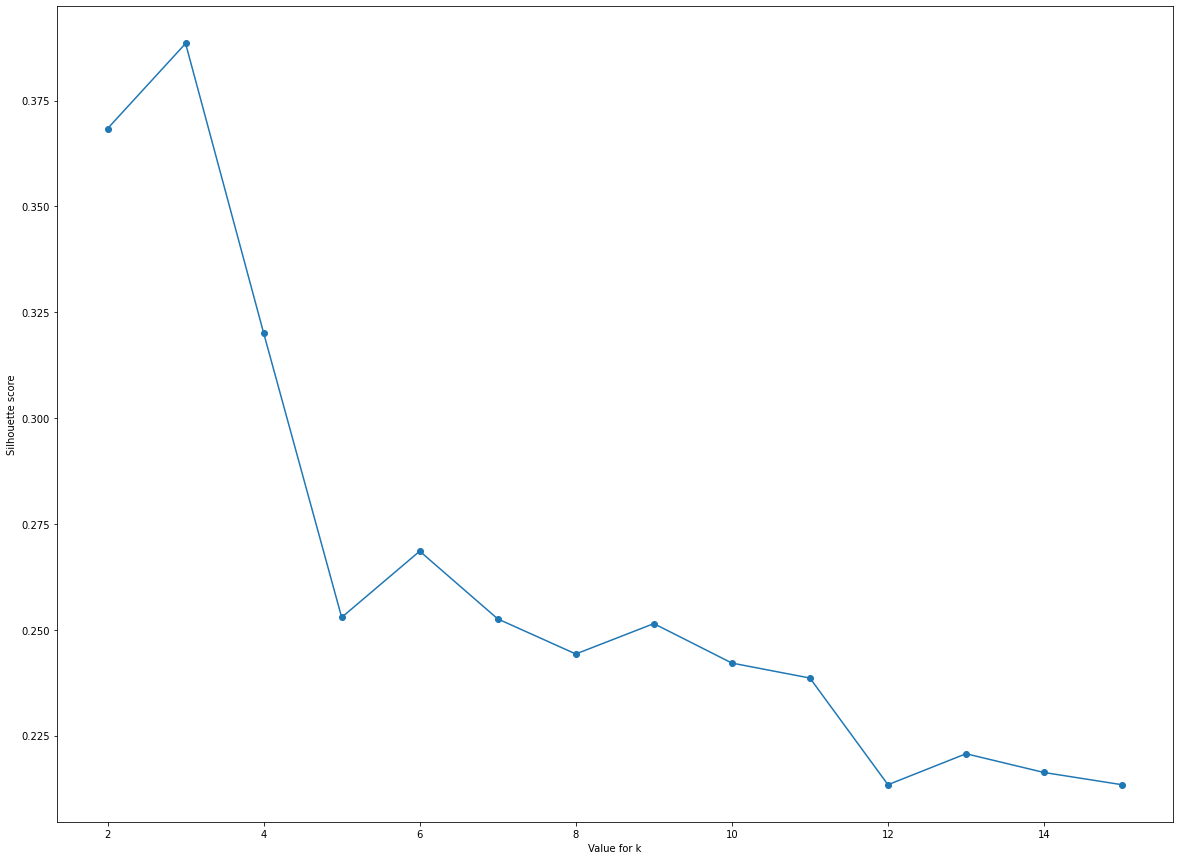

In [204]:
plt.figure(figsize=(20, 15))
plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.show()

In [226]:
def drawSSEPlot(df, column_indices, n_clusters=8, max_iter=300, tol=1e-04, init='k-means++', n_init=10, algorithm='auto'):
    import matplotlib.pyplot as plt
    inertia_values = []
    for i in range(2, 15):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df.iloc[:, column_indices])
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(20, 15))
    plt.plot(range(2, 15), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('WSSSE', fontsize=15)
    plt.grid()
    plt.show()

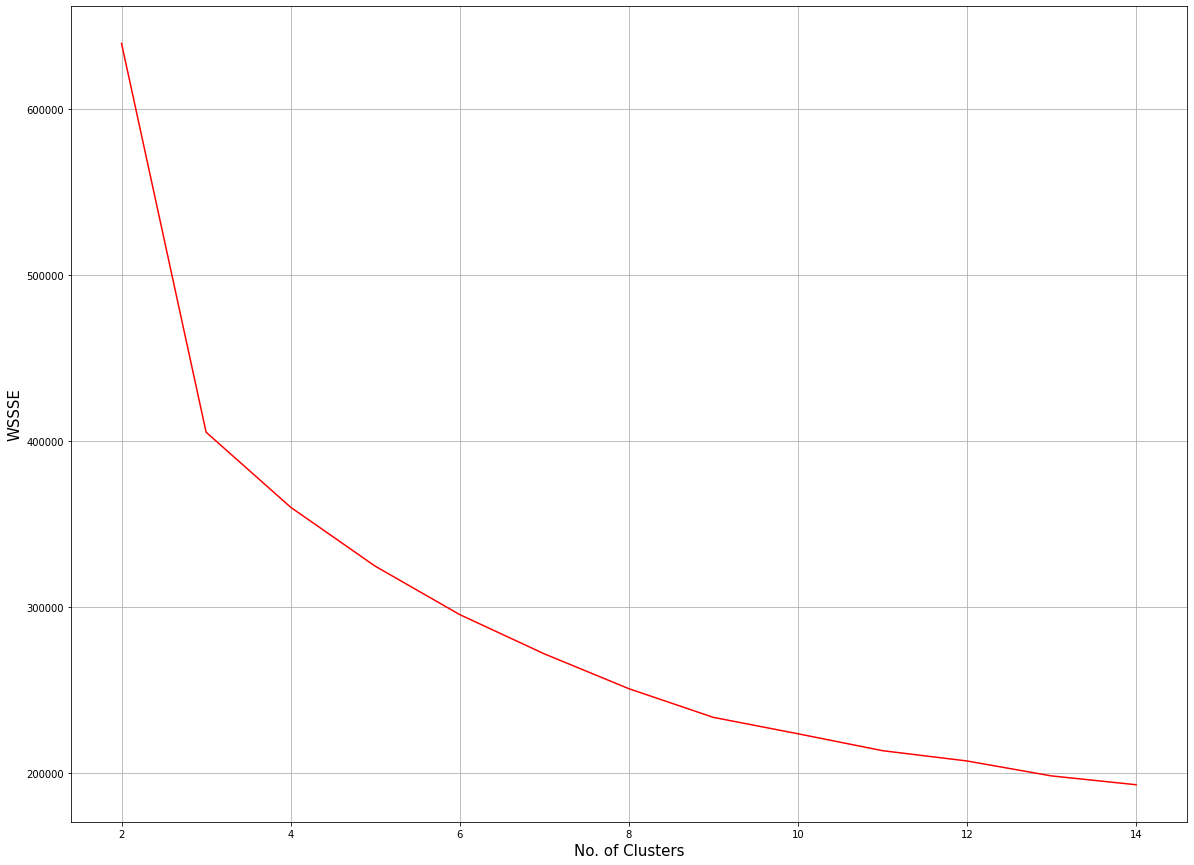

In [227]:
drawSSEPlot(X, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

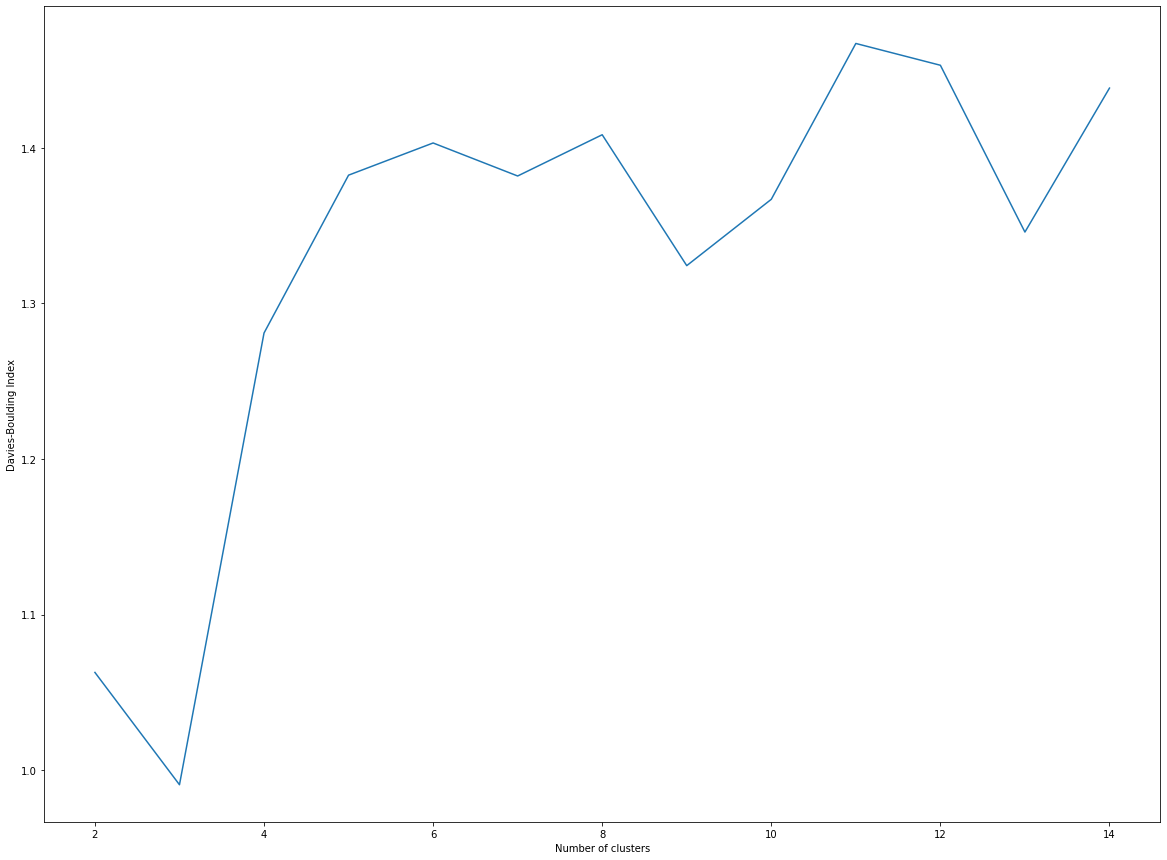

In [221]:
from sklearn.metrics import davies_bouldin_score

results = {}

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results.update({i: db_index})

plt.figure(figsize=(20, 15))
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

Таблица результаты

In [233]:
kmeans_model = KMeans(n_clusters = 3, random_state = 1).fit(X)

X['kmean 3'] = kmeans_model.labels_

X_3 = pd.DataFrame(X['kmean 3'].value_counts())
X_3['perc'] = 100*X_3['kmean 3']/sum(X_3['kmean 3'])

In [234]:
X_3

,kmean 3,perc
1,303,37.086903
2,274,33.537332
0,240,29.375765


In [235]:
kmeans_model = KMeans(n_clusters = 9, random_state = 1).fit(X)

X['kmean 9'] = kmeans_model.labels_

X_9 = pd.DataFrame(X['kmean 9'].value_counts())
X_9['perc'] = 100*X_9['kmean 9']/sum(X_9['kmean 9'])

In [236]:
X_9

,kmean 9,perc
3,124,15.177479
0,122,14.932681
1,108,13.219094
8,100,12.239902
4,90,11.015912
2,89,10.893513
5,83,10.159119
7,68,8.323133
6,33,4.039168
